# GRIP at The Sparks Foundation

## Exploring Unsupervised Machine Learning

## In the‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
##Importing the essential libraries
import pandas as pd 
import numpy as np

In [2]:
##Location of the dataset
location=(r"C:\Users\Abc\Downloads\iris.csv")

In [3]:
##Importing the dataset
data=pd.read_csv(location)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis

In [4]:
##Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
##descriptive statistics of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Checking whether the dataset has null values 

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###### So the dataset has no null values

In [7]:
##Correlation of the dataset
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [8]:
##Importing the seaborn package
import seaborn as sns

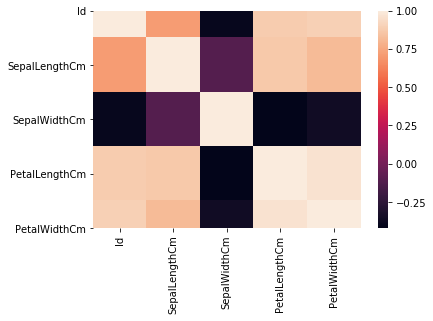

In [9]:
##Visualizing the correlation of the dataset using heatmap
sns.heatmap(data.corr())

##### Storing the independent features in 'x'

In [10]:
x = data.iloc[:, [1, 2, 3, 4]].values


In [11]:
##Displaying x
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
##Importing the 
import matplotlib.pyplot as plt

# Model buliding

#### Importing KMeans from Sklearn.cluster to find K value

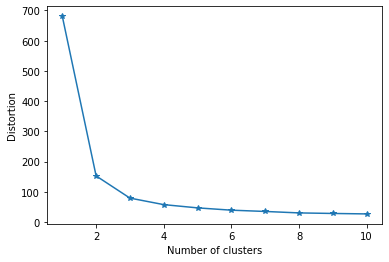

In [13]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

###### By oberserving the elbow diagram we infer that the cluster value is 3

In [14]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_kmeans  = km.fit_predict(x)

## Visualization of the cluster

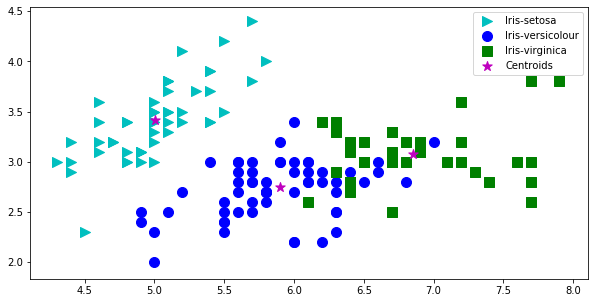

In [21]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0],
            x[y_kmeans == 0, 1], 
            s = 100, c = 'c', 
            label = 'Iris-setosa',marker='>')

plt.scatter(x[y_kmeans == 1, 0], 
            x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', 
            label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], 
            x[y_kmeans == 2, 1],
            s = 100, c = 'green', 
            label = 'Iris-virginica',marker='s')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'm', label = 'Centroids',marker='*')

plt.legend()